In [46]:
%run C:\Users\Utente\Desktop\STAT_ML_proj\Functions.ipynb
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
import plotly.graph_objects as go
from matplotlib.animation import FuncAnimation, FFMpegWriter
from itertools import product

In [34]:
hyper = {
    "d": 3,
    "beta": 0.5,
    "gamma": 0.5,
    "inner_n": 200,
    "outer_n": 30,
    "lambda_reg" : 0.001
}

d = 3

noise = 1

In [35]:
G_s = nx.barabasi_albert_graph(30,1,seed=43)
G_t = noise_sp(G_s,3/10,1)

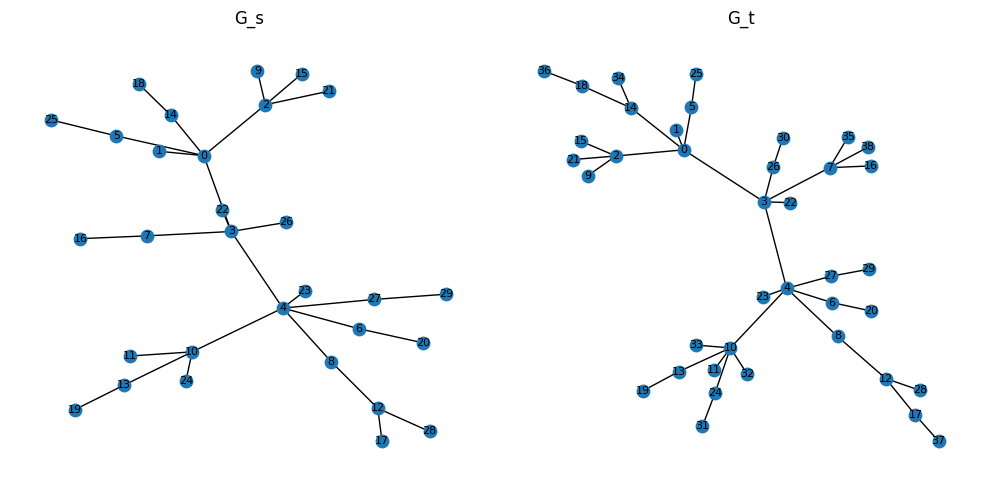

In [37]:
f,ax = plt.subplots(1,2,figsize = (10,5))
                    
pos_s=nx.spring_layout(G_s,iterations=100)
nx.draw(G_s,pos=pos_s, ax=ax[0], with_labels=True, node_size = 80, font_size=8)
ax[0].set_title("G_s")

pos_t=nx.spring_layout(G_t,iterations=100)
nx.draw(G_t,pos=pos_t, ax=ax[1], with_labels=True, node_size = 80, font_size=8)
ax[1].set_title("G_t")



plt.tight_layout()
plt.savefig("Plot of the Graphs")

In [38]:
m_s = adj_matrix_sp(G_s)
m_t = adj_matrix_sp(G_t)
l_s = len(G_s.nodes())
l_t = len(G_t.nodes())
C_s = build_similitude_matrices(m_s)
C_t = build_similitude_matrices(m_t)
M_s = build_measure(m_s)
M_t = build_measure(m_t)

In [39]:
# Here I am considering the average embedding over 100 different realizations
# Here I use the noise I defined previously

E_s = []
E_t = []
T_m = []
C_m = []
L_m = []
H_s = []
H_t = []
for k in range(100):
    emb_s = np.random.rand(d, l_s) * 5
    emb_2 = emb_s + np.random.rand(d,l_s) * noise
    emb_t = np.zeros((d,l_t))
    for i in range(l_s):
       emb_t[:,i] = emb_2[:,i]
    for i in range(l_s,l_t):
       emb_t[:,i] = (np.random.rand(d, 1) * 5).reshape(-1)
    embed_s, embed_t, T, correspondence, total_loss, embed_s_history, embed_t_history = GWL_simple_3(C_s, C_t, M_s, M_t,emb_s,emb_t, hyper)
    E_s.append(embed_s)
    E_t.append(embed_t)
    T_m.append(T)
    C_m.append(correspondence)
    L_m.append(total_loss)
    H_s.append(embed_s_history)
    H_t.append(embed_t_history)

In [40]:
EMBED_s = np.mean(E_s,1)
EMBED_t = np.mean(E_t,1)

In [41]:
EMBED_s

array([[3.04322205, 2.84380688, 2.61132357, ..., 3.10937315, 2.5927541 ,
        2.72573311],
       [2.5404263 , 2.81495349, 2.70953202, ..., 2.79818553, 2.49311132,
        2.52681008],
       [2.68345803, 2.59121366, 2.4197924 , ..., 2.50622841, 2.59278723,
        2.72259462],
       ...,
       [2.76129557, 2.67805961, 2.87212799, ..., 2.40836042, 2.83287473,
        2.65780931],
       [2.99589134, 2.92089019, 2.93882891, ..., 2.76913983, 2.89359389,
        2.62805329],
       [2.87491853, 2.83314891, 2.52646274, ..., 2.45937934, 2.55562679,
        2.33341701]])

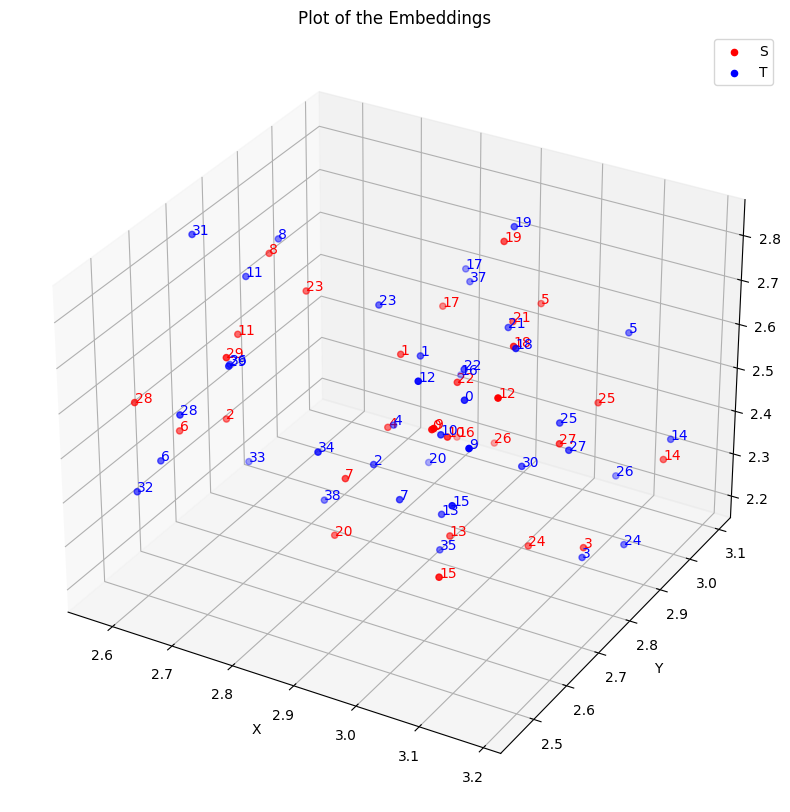

In [45]:
print_embeddings_one(EMBED_s, EMBED_t,name = "Plot_BA_100",Labels=True, save = True)

In [47]:
C_s

array([[1.        , 0.66666667, 0.66666667, 0.66666667, 0.75      ,
        0.66666667, 0.8       , 0.75      , 0.8       , 0.75      ,
        0.8       , 0.83333333, 0.83333333, 0.83333333, 0.66666667,
        0.75      , 0.8       , 0.85714286, 0.75      , 0.85714286,
        0.83333333, 0.75      , 0.75      , 0.8       , 0.83333333,
        0.75      , 0.75      , 0.8       , 0.85714286, 0.83333333],
       [0.66666667, 1.        , 0.75      , 0.75      , 0.8       ,
        0.75      , 0.83333333, 0.8       , 0.83333333, 0.8       ,
        0.83333333, 0.85714286, 0.85714286, 0.85714286, 0.75      ,
        0.8       , 0.83333333, 0.875     , 0.8       , 0.875     ,
        0.85714286, 0.8       , 0.8       , 0.83333333, 0.85714286,
        0.8       , 0.8       , 0.83333333, 0.875     , 0.85714286],
       [0.66666667, 0.75      , 1.        , 0.75      , 0.8       ,
        0.75      , 0.83333333, 0.8       , 0.83333333, 0.66666667,
        0.83333333, 0.85714286, 0.85714286, 0.